In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset=pd.read_csv('./wireless_churn.csv')
dataset.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [3]:
#Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
 10  Churn            3333 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
import joblib

#Show Key Statistics
dataset.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294,0.144914
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000,0.000000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000,0.000000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000,0.000000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000,1.000000


<Axes: >

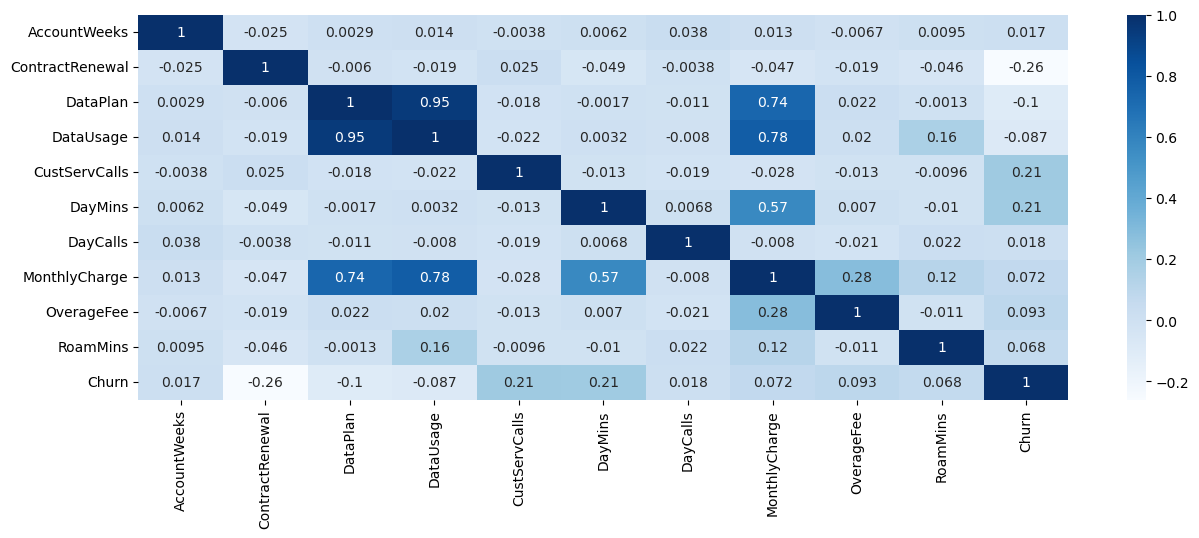

In [5]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

In [6]:
#Create x and y variables
x = dataset.drop('Churn', axis=1).to_numpy()
Y = dataset['Churn'].to_numpy()

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.transform(x)


In [7]:
#Prepare Models 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000,
                                               random_state=100))])
pipeline.insert(0,pipe_logreg)

pipe_gnb = Pipeline([('scl', StandardScaler()),
                    ('clf', GaussianNB())])

pipeline.insert(1,pipe_gnb)

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=100))])
pipeline.insert(2,pipe_rdf)


# Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(0,param_gridlogreg)

param_gridgnb = {}
modelpara.insert(1,param_gridgnb)

Model Evaluation - Recall Score
Logistic Regression 0.77 +/- 0.02
Naive Bayes 0.85 +/- 0.02
Random Forest 0.93 +/- 0.01




C:\Users\ryanc\AppData\Local\Temp\ipykernel_29800\1350680847.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


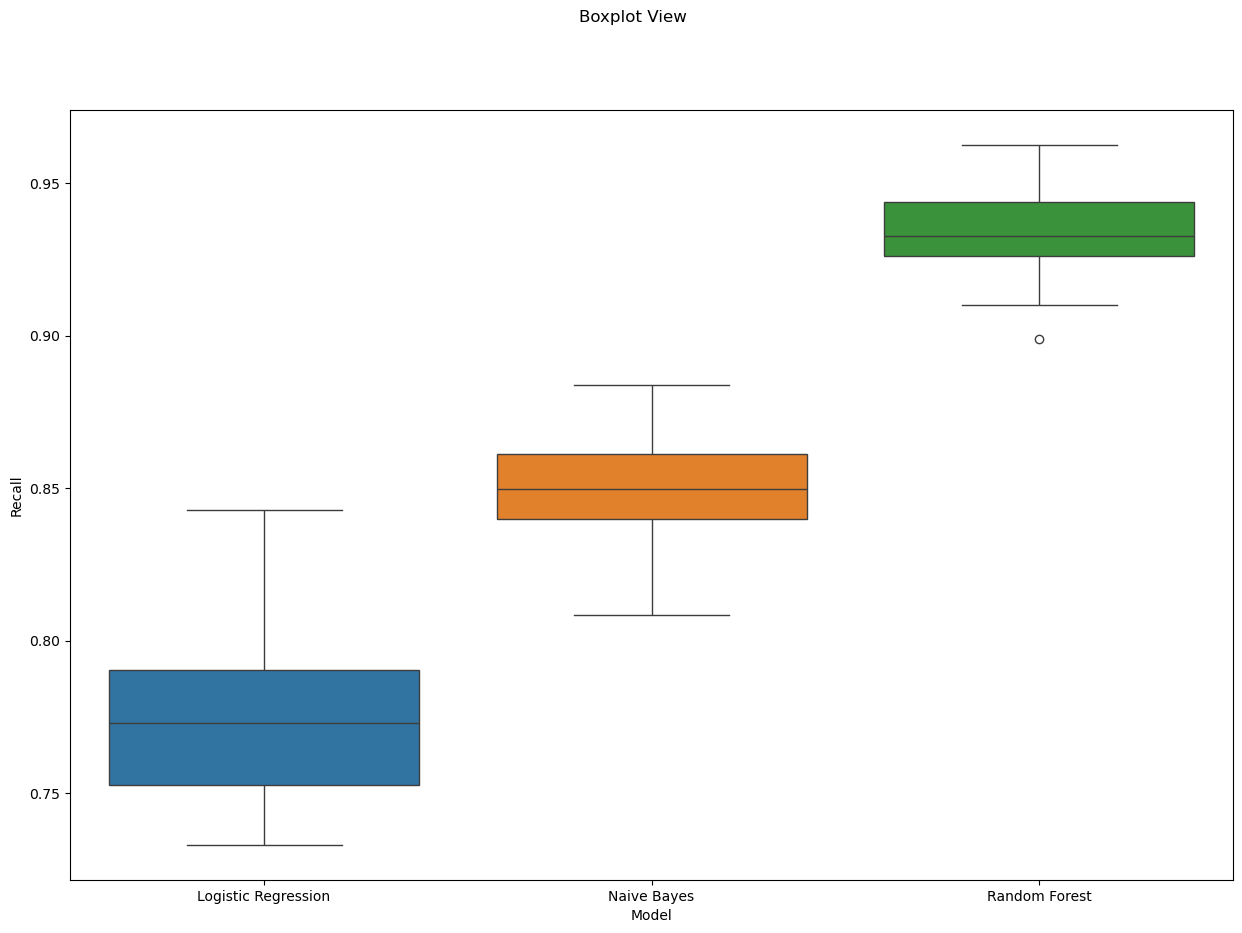

In [9]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='lbfgs',class_weight='balanced',
                                                        random_state=100)))
models.append(('Naive Bayes',GaussianNB()))

models.append(("Random Forest", RandomForestClassifier(random_state=100)))
#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train2,y_train,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [10]:
#Define Plot for learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            cv=10,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='lower right')
    plt.ylim([0.5, 1.01])
    plt.show()

Logisistic Regression - Learning Curve


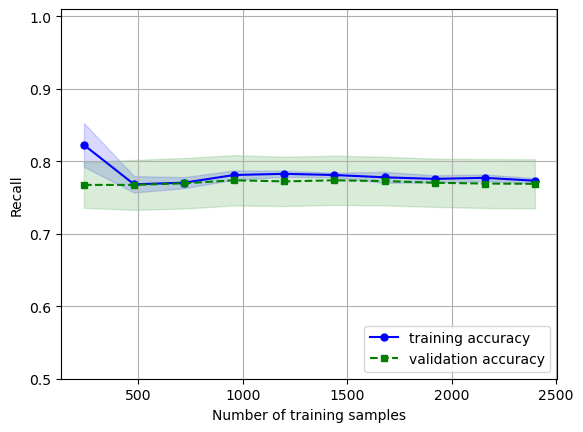

Naive Bayes - Learning Curve


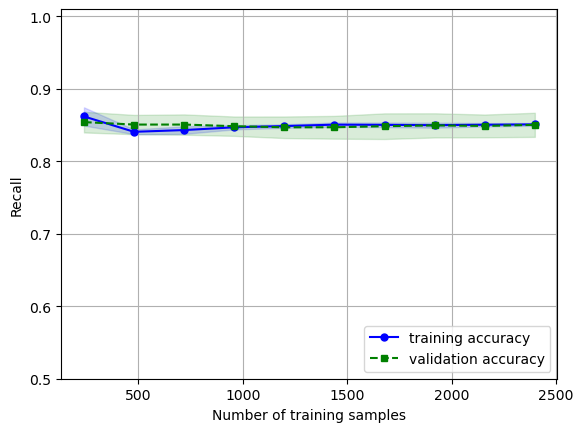

Random Forest - Learning Curve


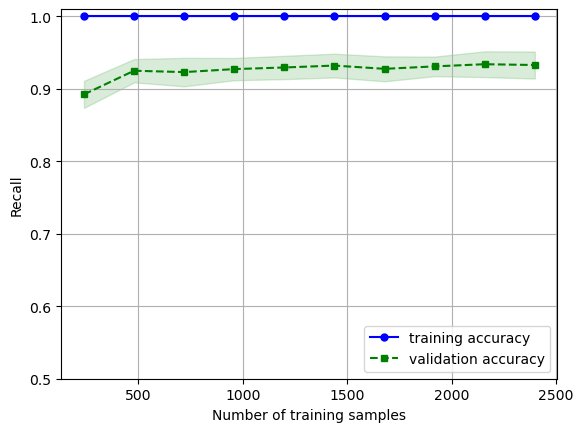

In [11]:
#Plot Learning Curve
# print('Logisistic Regression - Learning Curve')
# plot_learning_curves(pipe_logreg)
# print('Naive Bayes - Learning Curve')
# plot_learning_curves(pipe_gnb)
print('Logisistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)
print('Naive Bayes - Learning Curve')
plot_learning_curves(pipe_gnb)
print("Random Forest - Learning Curve")
plot_learning_curves(pipe_rdf)

In [12]:
# Script for Base Models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

for name, method in [
    ('Logistical Regression',
     LogisticRegression(solver='lbfgs', class_weight='balanced',
                        max_iter=1000, random_state=100)),
    ('Random Forest',
     RandomForestClassifier(random_state=100)),
    ('Naive Bayes',
     GaussianNB())
]:
    method.fit(x_train2, y_train)
    predict = method.predict(x_test2)
    print(f'\nEstimator: {name}')
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))
       


Estimator: Logistical Regression
[[434 136]
 [ 24  73]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.75      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667


Estimator: Random Forest
[[566   4]
 [ 39  58]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.94      0.60      0.73        97

    accuracy                           0.94       667
   macro avg       0.94      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667


Estimator: Naive Bayes
[[520  50]
 [ 60  37]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       570
           1       0.43      0.38      0.40        97

    accuracy                 

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np


pipeline = []

pipe_logreg = Pipeline([
    ('scl', StandardScaler()),
    ('clf', LogisticRegression(
        solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100))
])
pipeline.insert(0, pipe_logreg)

pipe_gnb = Pipeline([
    ('scl', StandardScaler()),  
    ('clf', GaussianNB())
])
pipeline.insert(1, pipe_gnb)

pipe_tree = Pipeline([
    ('clf', RandomForestClassifier(random_state=100))
])
pipeline.insert(2, pipe_tree)

modelpara = []

param_grid_logreg = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2']  # lbfgs supports l2
}
modelpara.insert(0, param_grid_logreg)

param_grid_gnb = {
    'clf__var_smoothing': np.logspace(-12, -7, 6)
}
modelpara.insert(1, param_grid_gnb)

param_grid_tree = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 3, 5, 7, 9, 12],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
}
modelpara.insert(2, param_grid_tree)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
scoring = 'f1' 

best_estimators = []

for pipe, param in zip(pipeline, modelpara):
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        refit=True,
        verbose=0
    )
    gs.fit(x_train2, y_train)


    est_name = pipe.named_steps['clf'].__class__.__name__
    print(f"\n=== {est_name} : Grid Search ===")
    print("Best params:", gs.best_params_)
    print(f"Best CV {scoring}: {gs.best_score_:.4f}")

    best_estimators.append(gs.best_estimator_)

for est in best_estimators:
    name = est.named_steps['clf'].__class__.__name__
    y_pred = est.predict(x_test2)
    print(f"\n>>> Optimized {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



=== LogisticRegression : Grid Search ===
Best params: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best CV f1: 0.4923

=== GaussianNB : Grid Search ===
Best params: {'clf__var_smoothing': np.float64(1e-12)}
Best CV f1: 0.4433

=== RandomForestClassifier : Grid Search ===
Best params: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}
Best CV f1: 0.7486

>>> Optimized LogisticRegression
[[435 135]
 [ 24  73]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       570
           1       0.35      0.75      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667


>>> Optimized GaussianNB
[[520  50]
 [ 60  37]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       570
           1       0.43      0.38      0.40       

In [14]:
import joblib

In [16]:
pipe_rdf.fit(x_train, y_train)


Pipeline(steps=[('scl', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=100))])

In [18]:
joblib.dump(pipe_rdf, "churn_pipeline.json")

['churn_pipeline.json']